In [1]:
import pandas as pd
from io import StringIO

In [2]:
csv_data = """A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,"""

In [3]:
df = pd.read_csv(StringIO(csv_data))
df.head()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [10]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.values)
imputed_data = imp.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [11]:
df = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [12]:
sz_mapping = {'M':1, 'L': 2, 'XL': 3}
inv_sz_mapping = {v:k for k,v in sz_mapping.items()}
df.size = df['size'].map(sz_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [13]:
class_mapping = {cls: idx for idx,cls in enumerate(df.classlabel.unique())}
df.classlabel = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [14]:
df = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [15]:
from sklearn.preprocessing import LabelEncoder

cls_enc = LabelEncoder()
y = cls_enc.fit_transform(df.classlabel.values)
print(y)
y = cls_enc.inverse_transform(y)
print(y)

[0 1 0]
['class1' 'class2' 'class1']


In [16]:
df = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df.size = df['size'].map(sz_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [17]:
X = df[['color', 'size', 'price']].values
clr_enc = LabelEncoder()
X[:, 0] = clr_enc.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [18]:
df = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df.size = df['size'].map(sz_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [19]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
one_enc = OneHotEncoder(categories=[np.unique(X[:, 0])])
one_hot_encoded = one_enc.fit_transform(X[:, 0].reshape(-1, 1)).toarray()
X_encoded = np.hstack((one_hot_encoded, X[:, 1:]))

In [20]:
X_encoded

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [21]:
df = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df.size = df['size'].map(sz_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [22]:
pd.get_dummies(df[['color', 'size', 'price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,False,True,False
1,2,13.5,False,False,True
2,3,15.3,True,False,False


In [23]:
pd.get_dummies(df[['color', 'size', 'price']], drop_first=True)

,size,price,color_green,color_red
0,1,10.1,True,False
1,2,13.5,False,True
2,3,15.3,False,False


In [24]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
'ml/machine-learning-databases/'
'wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                    'Malic acid', 'Ash',
                    'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids',
                    'Nonflavanoid phenols',
                    'Proanthocyanins',
                    'Color intensity', 'Hue',
                    'OD280/OD315 of diluted wines',
                    'Proline']
df_wine.head(5)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
len(df_wine['Class label'].unique())

3

In [26]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0]
print(X.shape, y.shape)
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

(178, 13) (178,)


In [27]:
from sklearn.preprocessing import MinMaxScaler
min_sclr = MinMaxScaler()
x_trian_norm = min_sclr.fit_transform(x_train)
x_test_norm = min_sclr.fit_transform(x_test)

In [28]:
from sklearn.preprocessing import StandardScaler
sdc_sclr = StandardScaler()
x_train_std = sdc_sclr.fit_transform(x_train)
x_test_std = sdc_sclr.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lgr.fit(x_train_std, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [30]:
print(f'trian acc: {lgr.score(x_train_std, y_train)}')
print(f'test acc: {lgr.score(x_test_std, y_test)}')

trian acc: 1.0
test acc: 1.0


In [31]:
lgr.intercept_, lgr.coef_

(array([-1.26358218, -1.21581487, -2.37031078]),
 array([[ 1.24579189,  0.18058893,  0.74511677, -1.16266175,  0.        ,
          0.        ,  1.16407992,  0.        ,  0.        ,  0.        ,
          0.        ,  0.55295871,  2.5094651 ],
        [-1.53738754, -0.38730036, -0.99545069,  0.36490683, -0.0594903 ,
          0.        ,  0.66829444,  0.        ,  0.        , -1.93381619,
          1.23392689,  0.        , -2.23157039],
        [ 0.13564919,  0.16854684,  0.35736377,  0.        ,  0.        ,
          0.        , -2.43779339,  0.        ,  0.        ,  1.56356798,
         -0.8188879 , -0.49295965,  0.        ]]))

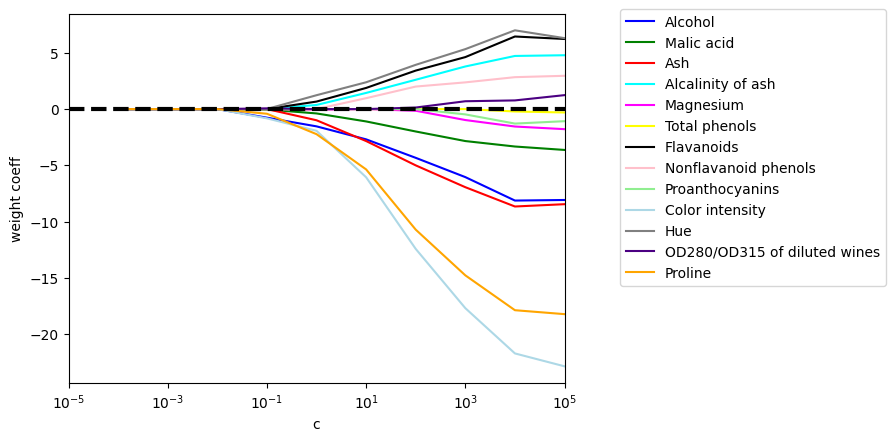

In [32]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)

weights, params = [], []
for c in range(-4, 6):
    lgr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', random_state=0)
    lgr.fit(x_train_std, y_train)
    weights.append(lgr.coef_[1])
    params.append(10.**c)

colors = ['blue', 'green', 'red', 'cyan',
            'magenta', 'yellow', 'black',
            'pink', 'lightgreen', 'lightblue',
            'gray', 'indigo', 'orange']
weights = np.array(weights)

for clmn, clr in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, clmn], color=clr, label=df_wine.columns[clmn+1])
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim(10**-5, 10**5)
plt.xlabel('c')
plt.ylabel('weight coeff')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [33]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [34]:
class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
        
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]
                

In [37]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(x_train_std, y_train);

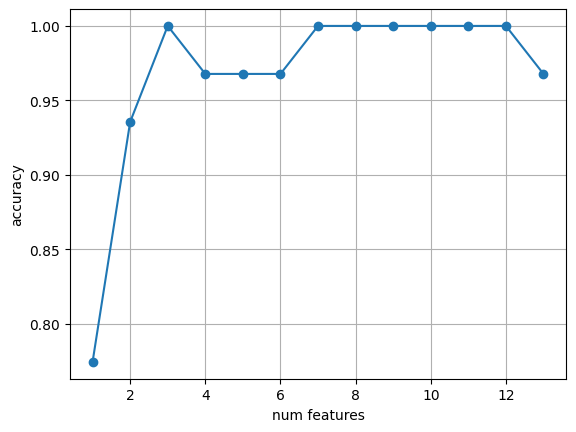

In [41]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o');
plt.xlabel('num features')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [43]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [44]:
knn.fit(x_train_std, y_train)
print(f"train acc: {knn.score(x_train_std, y_train)}")
print(f"test acc: {knn.score(x_test_std, y_test)}")

train acc: 0.967741935483871
test acc: 0.9629629629629629


In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train_std[:, k3], y_train)
print(f"train acc: {knn.score(x_train_std[:, k3], y_train)}")
print(f"test acc: {knn.score(x_test_std[:, k3], y_test)}")

train acc: 0.9516129032258065
test acc: 0.9259259259259259
